<a href="https://colab.research.google.com/github/surajjorwar/Machine-Learning-Tasks-/blob/main/Dimensionality_reduction_and_wine_clustering_video_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import  KMeans
from sklearn.decomposition import PCA



In [59]:
wine_df = pd.read_csv('/content/drive/MyDrive/andrew ng /wine data/wine-clustering.csv')

In [60]:
wine_df.head(4)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


In [61]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


# Scaling the data

In [62]:
scalar = MinMaxScaler()

In [63]:
wine_df = pd.DataFrame(scalar.fit_transform(wine_df),columns = wine_df.columns)


In [64]:
wine_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


## no of clusters to be used using elbow method

In [65]:
X= wine_df

wcss = [] #within clusters sum of square error
for i in range(1,12):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters = i,init = "k-means++",random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

# within clusters sum of square error

In [66]:
list(wcss)

[95.59953778471062,
 64.5376670238943,
 48.96051713667649,
 44.82565025179786,
 42.38580327835326,
 40.14714550556363,
 38.2555554907763,
 36.333712203799024,
 34.66737063619046,
 32.81749901990968,
 31.802699206593743]

# Elbow plot to get the value of k (no of clusters )

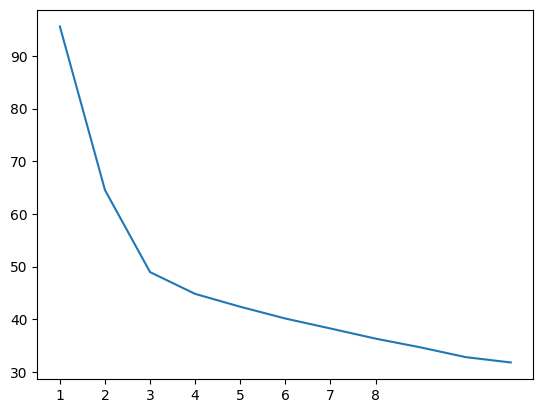

In [67]:
plt.plot(range(1,12),wcss)
plt.xticks(range(1,9))
plt.show()

# implementing Kmeans clustering

In [69]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3,init = "k-means++")
X['category'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# PCA for Dimensionality Reduction and to visualizing clustered data

In [80]:
import plotly.graph_objs as go
import plotly.offline as py

# Reduce dimensionality to 3 dimensions using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.iloc[:, :-1])  # Excluding the 'category' column for visualization

# Create traces for each cluster
traces = []
for category in range(3):
    subset = X_pca[X['category'] == category]
    trace = go.Scatter3d(
        x=subset[:, 0],
        y=subset[:, 1],
        z=subset[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=category,  # Assigning different colors based on the category
            colorscale='Viridis',
            opacity=0.8
        ),
        name=f'Cluster {category}'
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='K-means Clustering (PCA Visualization)',
    scene=dict(
        xaxis=dict(title='Principal Component 1'),
        yaxis=dict(title='Principal Component 2'),
        zaxis=dict(title='Principal Component 3')
    )
)

# Plot
fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)
